<a href="https://colab.research.google.com/github/Hertie-School-Machine-Learning-F2022/git-github-assignment-and-fundamentals-nikpaw/blob/main/Problem_Set_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 3.

Submit by: Thursday Nov 3, 2022, 23:59

Please answer the problem set and submit the code to the corresponding github repository.

In [31]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [32]:
from google.colab import files
uploaded = files.upload()

Saving adult-census.csv to adult-census (1).csv


In [33]:
# Load the dataset called adult-census.csv and save it as a Pandas DF called adult_census
import io

adult_census = pd.read_csv(io.BytesIO(uploaded["adult-census.csv"]))
adult_census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [34]:
adult_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


**Question 1. What is the mean value of "age"?**

In [35]:
# Calculate the mean of "age" variable
adult_census["age"].mean()


38.64358543876172

Set "class" as your target variable y

Set only the numerical features (currently saved as either integers or floats) as X.


In [36]:
# Set X and y 

y = adult_census[["class"]]
X = adult_census[["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]]

**Question 2. What is the standard deviation of the variable "capital-gain" in X?**


In [37]:
# Calculate the s.d. of "capital-gain"
adult_census["capital-gain"].std()  

7452.019057655394

"Education-num" is not going to be used in this model. Remove the "education-num" variable from X.

In [38]:
# Remove "education-num" variable from the X data you set above

X = adult_census[["age", "capital-gain", "capital-loss", "hours-per-week"]]

**Question 3. How many numerical features are present in X now?**

In [39]:
# Write your code here
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


**Question 4. What is the most frequent feature in y?**

In [40]:
# Write your code here
y.value_counts()

class 
 <=50K    37155
 >50K     11687
dtype: int64

Using the X that only contained the numerical variables without education-num, and the previously set y:

Compare the generalization performace using the accuracy of the two following predictive models (no training and testing set necessary):


*   A linear model composed of StandardScaler and a LogisticRegression
*   A DummyClassifier predicting the most frequent class



In [41]:
# Import the models and fit the using X and y (For this problem set you do not have to 
# use training and testing sets)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression())
])

# y = adult_census["class"].to_numpy()

y = adult_census["class"]

pred = pipe.fit(X, y).predict(X)



Accuracy linear model StandardScaler/LogisticRegression: 0.8001105605831047


In [42]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X, y)


Accuracy dummy classifier: 0.7607182343065395



**Question 5. By comparing test scores of both models, which classifier did better?**

In [45]:
# Obtain the scores of both models
print(f"Accuracy linear model StandardScaler/LogisticRegression: "
      f"{accuracy_score(y, pred)}")

print(f"Accuracy dummy classifier: "
      f"{dummy_classifier.score(X, y)}")

Accuracy linear model StandardScaler/LogisticRegression: 0.8001105605831047
Accuracy dummy classifier: 0.7607182343065395


**Question 6. What is the value of the odds ratio of the "capital-loss" feature?**

In [54]:
# Acces the coeficients and calculate the odds
log_base = LogisticRegression()
coef = log_base.fit(X, y).coef_[0][2]
odds = np.exp(coef)
print(odds)


1.000761125130776


:Use a Confusion Matrix to evaluate the predictions with more granularity.


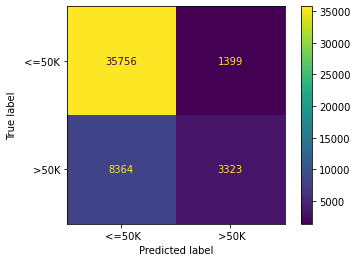

In [58]:
# Visualize a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_predictions(y, pred)


**Question 7. Do you think accuracy is a good metric to evaluate this dataset? Justify your answer.**

The accuracy is not a particuarly helpful metric because of the somewhat uneven distribution within the target variable class. Since one label (<=50K) is considerably more frequent than the other (>50k), the model performs good in accuracy by overestimating the share of the larger group. This ensures that the accuracy is high as a large number of the high-share predictions will be correct, but systematically hurts the model quality by underweighing the importance of the less frequent category. 